# NLP Text Pre-processing


In this notebook, we will learn how to perform the following operations:

- Punctuation removal
- Case normalisation
- Stop word removal
- Stemming
- Lemmatization

We will also combine these steps together to create a text-preprocessing pipeline.


## Pre-requisites

The NLTK library comes pre-installed with Anaconda. If the `import nltk` statement gives a `ModuleNotFound` error, we can install the package using pip in our virtual environment

`python -m pip install nltk`

We will also make use of some datasets that come packaged with nltk. These can be installed by running `nltk.download("popular")` after running `import nltk`


In [2]:
%pip install nltk


  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB 8.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.5 MB 5.8 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.5 kB ? eta -:--:--
   ---------------------------------------- 269.5/269.5 kB 5.6 MB/s eta 0:00:00
   -----------------------------

In [3]:
# Import the Natural Language toolkit
import nltk


In [4]:
# Download nltk data
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\MaxBeck\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\MaxBeck\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\MaxBeck\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\MaxBeck\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\MaxBeck\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\MaxBeck\AppDat

True

In [5]:
# Additional imports
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

Printing a list of stopwords in the English language from NLTK


In [6]:
stopword_list = stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# Stopword lists are also available for other languages
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


## Setting up our corpus

Let us set up an example corpus with the following five documents.

```Python
corpus = [
    "The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.",
    "The cats are meowing loudly! They meow when they're hungry or want to play.",
    "Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.",
    "The quick brown foxes are jumping over the lazy dogs. The dogs have started barking loudly!!",
    "The first document and the second document and the third document are documented online on Wikipedia! :)"
]
```


In [8]:
corpus = [
    "The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.",
    "The cats are meowing loudly! They meow when they're hungry or want to play.",
    "Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.",
    "The quick brown foxes are jumping over the lazy dogs. The dogs have started barking loudly!!",
    "The first document and the second document and the third document are documented online on Wikipedia! :)"
]

In [9]:
# Check the length of the corpus
len(corpus)

5

Now, let us use the second last document as our running example to perform pre-processing


In [10]:
# Index the second last document in this list and store it as sample_doc
sample_doc = corpus[-2]
print(sample_doc)

The quick brown foxes are jumping over the lazy dogs. The dogs have started barking loudly!!


### Case normalisation and punctuation removal

We can perform case normalisation on a document using the `str.lower()` method


In [11]:
# Check the type of sample_doc
type(sample_doc)

str

In [12]:
# Perform case normalisation on the sample_doc using str.lower() method
sample_doc.lower()

'the quick brown foxes are jumping over the lazy dogs. the dogs have started barking loudly!!'

Punctuations can be removed by using regular expressions. Here, we look for any characters that are not alphanumeric and replace them with a whitespace character.


In [13]:
# Removing punctuations using regex
# the ^ indicates negation. 
# The first argument is the set of characters we are looking to replace (i.e. anything that is NOT alphanumeric)
# The second argument is what we want to replace it with
# The third argument is the string that we want to search and replace
pattern = re.compile(r"[^a-zA-Z0-9 ]")
cleaned_doc = re.sub(pattern, '', sample_doc)
print(cleaned_doc)


The quick brown foxes are jumping over the lazy dogs The dogs have started barking loudly


In [24]:
# Perform both the pre-processing operations on our sample document and update the sample_doc variable. 
# TYPE YOUR CODE HERE
sample_doc = "DulcE et decorum esT !£!£!£di pro patria mori! :()()()"
print(sample_doc)
sample_doc = sample_doc.lower()
pattern = re.compile(r"[^a-zA-Z0-9 ]")
cleaned_doc = re.sub(pattern, '', sample_doc)


print(cleaned_doc)

DulcE et decorum esT !£!£!£di pro patria mori! :()()()
dulce et decorum est di pro patria mori 


### Tokenisation


Before performing pre-processing steps such as stop word removal, stemming and lemmatization, we first need to tokenize our document. In Python, this can be done in a couple of different ways.

- Using nltk's `word_tokenize` function (this is the preferred method for nlp applications)
- Using Python's `str.split()` method (this will work in some cases and is probably faster but does not always create tokens in the linguistics sense)


In [32]:
# To tokenize, we leverage on nltk's word_tokenize function
# Create a sample_doc_tokenized object to store the output of word_tokenize() on sample_doc
# TYPE YOUR CODE HERE
sample_doc = corpus[-2]
sample_doc_tokenized = word_tokenize(sample_doc)

In [29]:
# We can also use the string split method to tokenize the sentence into words
sample_doc.split()

['The',
 'quick',
 'brown',
 'foxes',
 'are',
 'jumping',
 'over',
 'the',
 'lazy',
 'dogs.',
 'The',
 'dogs',
 'have',
 'started',
 'barking',
 'loudly!!']

### Stop word removal


In [30]:
# Let us print the stopword_list once again for reference
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Filter out stop words from the tokenized document using the stop word list.


In [34]:
# Create a sample_doc_tokenized_filter variable to store the tokenized words that are not in stopword_list
# TYPE YOUR CODE HERE
sample_doc_tokenized_filter = [word for word in sample_doc_tokenized if word not in stopword_list]
print(sample_doc_tokenized_filter)

['The', 'quick', 'brown', 'foxes', 'jumping', 'lazy', 'dogs', '.', 'The', 'dogs', 'started', 'barking', 'loudly', '!', '!']


### Stemming and Lemmatization


Create a stemmer object from the PorterStemmer class and test some example words


In [35]:
# Create the stemmer object
stemmer = PorterStemmer()

In [36]:
# Stem the word 'playing' using the stem method
stemmer.stem('playing')

'play'

In [ ]:
# Try stemming the word 'wolves'
# TYPE YOUR CODE HERE


In [ ]:
# Try stemmer on another word of your own choice
# TYPE YOUR CODE HERE


Create a lemmatizer object from the WordNetLemmatizer class and test some example words


In [37]:
# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

In [38]:
# Lemmatize the word 'wolves' using the lemmatize method
lemmatizer.lemmatize('wolves')

'wolf'

We can also include a part of speech tag along with the word to lemmatize to a different root word


In [ ]:
# Lemmatize 'does' as a verb
lemmatizer.lemmatize('does', 'v')

In [ ]:
# Lemmatize 'does' as a noun
lemmatizer.lemmatize('does', 'n')

Perform the lemmatization step on our running example


In [39]:
# Print out the sample_doc_tokenized_filter object again for reference
print(sample_doc_tokenized_filter)

['The', 'quick', 'brown', 'foxes', 'jumping', 'lazy', 'dogs', '.', 'The', 'dogs', 'started', 'barking', 'loudly', '!', '!']


In [44]:
# Perform lemmatization on sample_doc_tokenized_filter and save it as sample_doc_lemmatized
# TYPE YOUR CODE HERE
sample_doc_lemmatized = [lemmatizer.lemmatize(token) for token in sample_doc_tokenized_filter]

In [45]:
# Print out sample_doc_lemmatized
print(sample_doc_lemmatized)

['The', 'quick', 'brown', 'fox', 'jumping', 'lazy', 'dog', '.', 'The', 'dog', 'started', 'barking', 'loudly', '!', '!']


In [ ]:
# Use the string join() method on sample_doc_lemmatized to join the tokens back into one string
# TYPE YOUR CODE HERE

---


### Bonus: Creating Wordclouds for documents

Wordclouds are useful to undersatnd which words are commonly occurring in our document.

In order to build wordclouds in Python, we have to install it in our current environment using `pip`.

`python -m pip install wordcloud`


In [41]:
!python -m pip install wordcloud

  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached pillow-10.2.0-cp311-cp311-win_amd64.whl.metadata (9.9 kB)
  Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp311-cp311-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)
Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl (7.6 MB)
Using cached pillow-10.2.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.49.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
   ---------------------------------------- 0.0/

In [42]:
# From the wordcloud module, import the WordCloud class
from wordcloud import WordCloud

In [43]:
# Additional imports
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg # this provides a corpus of some well known documents

In [46]:
# Let's take a look at the documents in this corpus
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [47]:
# Let us use one of the documents as our example to create wordcloud. We can use gutenberg.raw('document_name') to get the raw text
document = gutenberg.raw('carroll-alice.txt')

In [48]:
type(document)

str

In [49]:
# Print the first 1000 characters from this document
print(document[:1000])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

In [50]:
# Generate a wordcloud image using  the WordCloud class
# Note: WordCloud by default uses bigrams (or 2-grams). We can disable this by setting collocations=False
# The WordCloud.generate() method creates an image
wc = WordCloud(width=1000, height=800, min_font_size=10, collocations=False).generate(document)

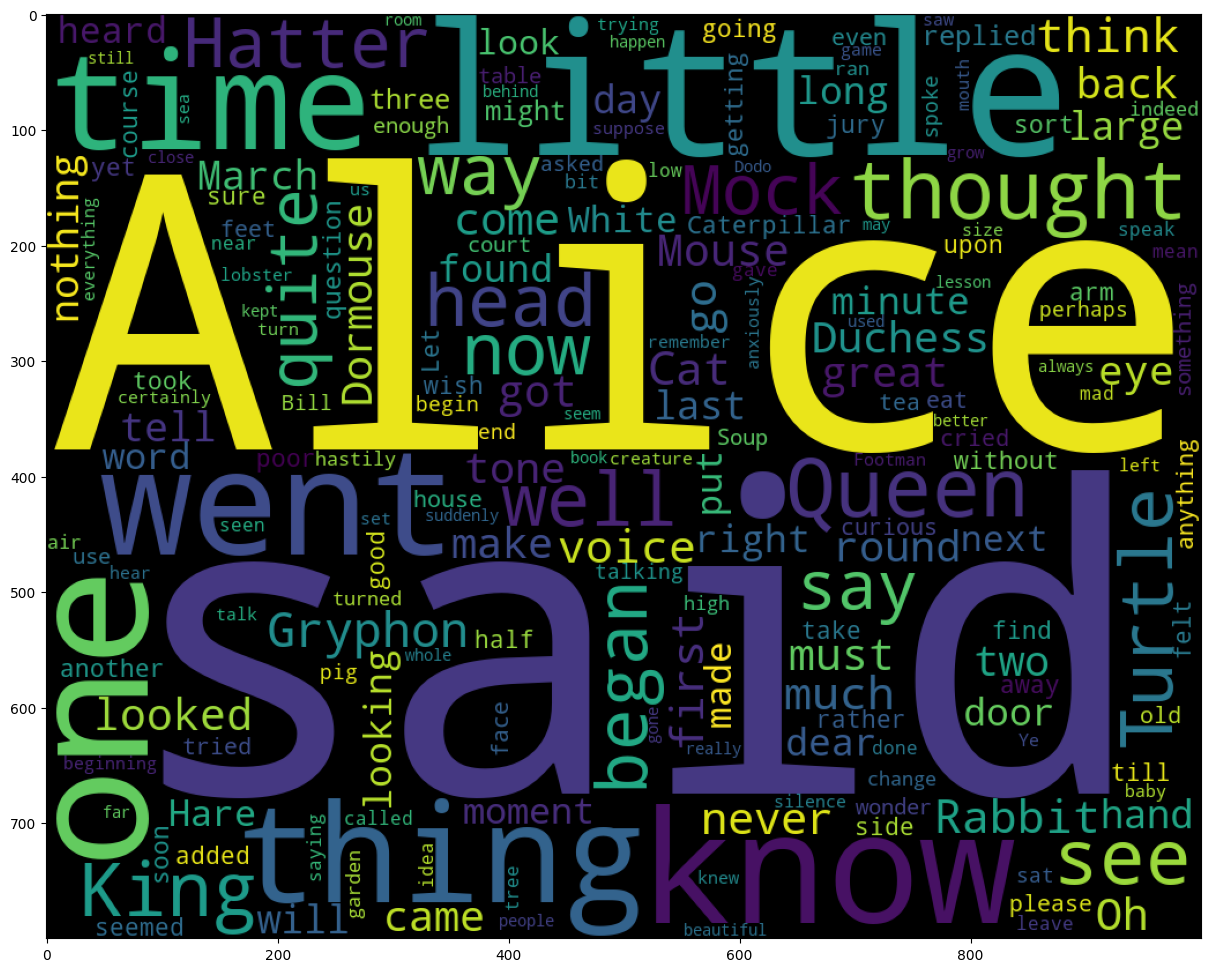

In [51]:
# Plot the image using Matplotlib's imshow() method
fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(wc)

---


### Exercise: NLP Pre-processing

In this exercise, you will create an NLP pre-processing pipeline. After completing these functions, put them into a module `nlprep_utilities.py` so that they can be reused later.


In [54]:
def remove_punctuation(text):
    '''
    Takes in a text string and returns a string with all the punctuation removed.
    '''
    pattern = re.compile(r"[^a-zA-Z0-9 ]")
    cleaned_doc = re.sub(pattern, '', text)
    return cleaned_doc

def normalize_case(text):
    '''
    Takes in a text string and returns a string with all characters in lower case. 
    '''
    return text.lower()

def tokenize_text(text):
    '''
    Takes in a text string and returns a list where each item corresponds to a token.
    '''
    tokenized_text = word_tokenize(text)
    return tokenized_text

def remove_stopwords(tokenized_text):
    '''
    Takes in a list of text, and returns another list where the stop words have been removed.
    '''
    text_tokenized_filter = [word for word in tokenized_text if word not in stopword_list]
    return text_tokenized_filter

def lemmatize_text(tokenized_text):
    '''
    Takes in a list of text, and returns another list where each word has been lemmatized.
    '''
    text_lemmatized = [lemmatizer.lemmatize(token) for token in text_tokenized_filter]
    return text_lemmatized

def process_text(text):
    '''
    Takes in a raw text document and performs the following steps in order:
    - punctuation removal
    - case normalization
    - tokenization
    - remove stopwords
    - lemmatization

    Then returns a string containing the processed text
    '''
    cleaned_text = remove_punctuation(text)
    normalized_text = normalize_case(cleaned_text)
    tokenized_text = tokenize_text(normalized_text)
    text_without_stopwords = remove_stopwords(tokenized_text)
    lemmatized_text = lemmatize_text(text_without_stopwords)
    processed_text = ' '.join(lemmatized_text)
    return processed_text

In [55]:
# Let us try out our module on a new document named my_doc
my_doc = 'Yer a wizard, Harry!'

In [24]:
# Import the nlprep_utilities module
import nlprep_utilities1

In [25]:
# Run the process_text function on my_doc
nlprep_utilities1.process_text(my_doc)
#TODO not sure why this isnt working


AttributeError: module 'nlprep_utilities1' has no attribute 'process_text'

---


## Exercise: Frequency Distributions

1. Use Pandas to get the frequency of all the words in the document.
2. Create a bar chart displaying the frequencies of the 20 most commonly occuring words.
3. (Stretch) Plot the frequency distribution bar chart (for the top 20 words) for 2-grams
4. Plot the frequency distribution bar chart (for the top 20 tokens) for 1- & 2- grams put together.
5. Instead of using Pandas, try 1. with `FreqDist` from `nltk`.


the           1399
and            727
to             652
a              560
she            459
              ... 
awfully          1
clever           1
airs             1
stairsthat       1
happy            1
Name: count, Length: 4497, dtype: int64


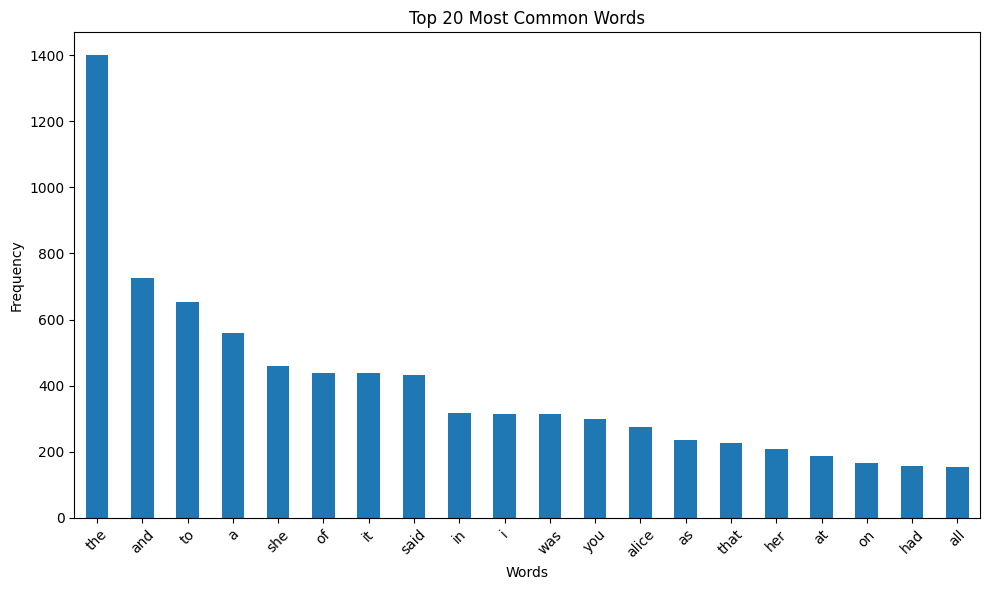

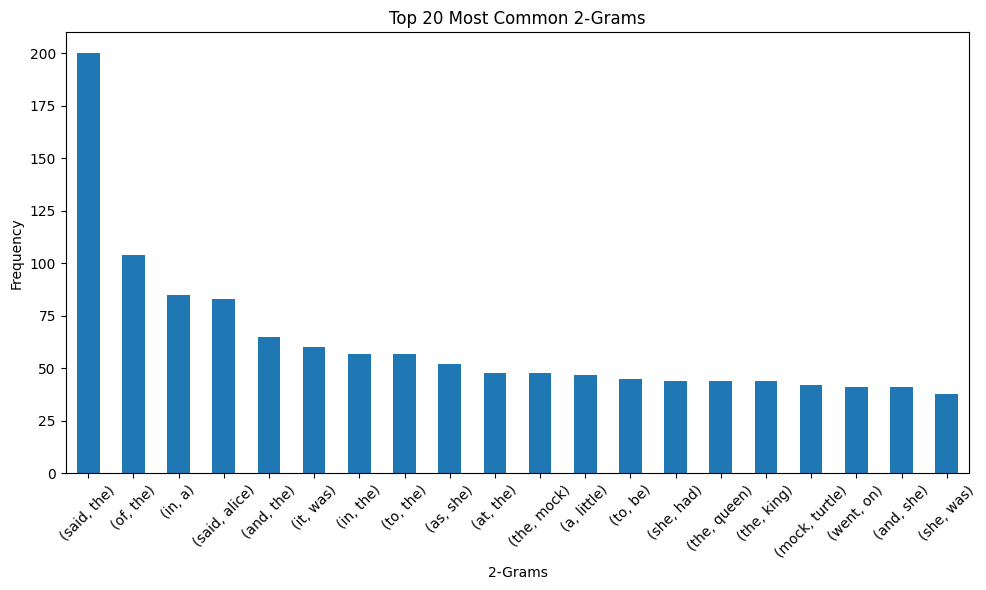

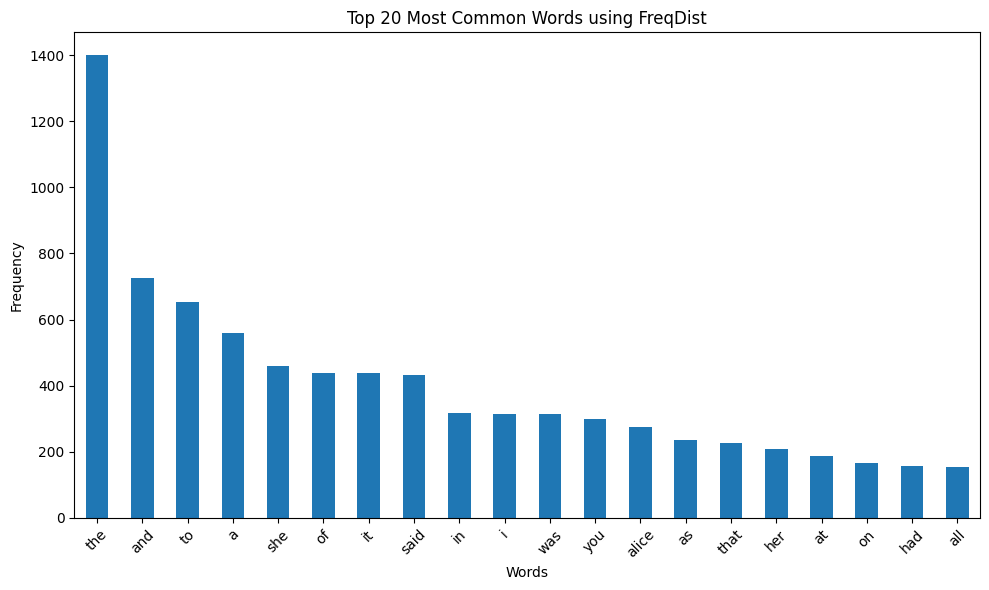

In [66]:
######CHATGPT SOLUTION######
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import ngrams
from collections import Counter

# Sample text
text = document
pattern = re.compile(r"[^a-zA-Z0-9 ]")
cleaned_doc = re.sub(pattern, '', text)
text = cleaned_doc

# Step 1: Tokenize the text

tokens = word_tokenize(text.lower())

# Step 2: Get the frequency of all words using Pandas
word_freq = pd.Series(tokens).value_counts()
print(word_freq)

# Step 3: Create a bar chart for the 20 most common words
plt.figure(figsize=(10, 6))
word_freq.head(20).plot(kind='bar')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Plotting the frequency distribution bar chart for 2-grams (stretch goal)
bigrams = list(ngrams(tokens, 2))
bigram_freq = FreqDist(bigrams)

plt.figure(figsize=(10, 6))
pd.Series(dict(bigram_freq.most_common(20))).plot(kind='bar')
plt.title('Top 20 Most Common 2-Grams')
plt.xlabel('2-Grams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Using FreqDist from NLTK instead of Pandas
freq_dist = FreqDist(tokens)

plt.figure(figsize=(10, 6))
pd.Series(dict(freq_dist.most_common(20))).plot(kind='bar')
plt.title('Top 20 Most Common Words using FreqDist')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
